In [1]:
# %load_ext jupyternotify
import numpy as np
import pandas as pd
import matplotlib
import math
from sklearn import model_selection, ensemble, metrics, linear_model, preprocessing, pipeline
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('dataset/undp_train.csv', na_values='nan')
test = pd.read_csv('dataset/undp_test.csv', na_values='nan')

In [3]:
idx = pd.IndexSlice

In [4]:
data_ind = data.set_index(['year', 'country'])
test_ind = test.set_index(['year', 'country'])

In [18]:
list(enumerate(data_ind.columns))

[(0, 'Life expectancy Index'),
 (1, 'Life expectancy at birth'),
 (2, 'Gross national income (GNI) per capita (2011 PPP$)'),
 (3, 'Income Index'),
 (4, 'Expected years of schooling (years)'),
 (5, 'Mean years of schooling (years)'),
 (6, 'Human Development Index (HDI)'),
 (7, 'Education Index'),
 (8, 'Population using at least basic drinking-water services (%)'),
 (9, 'Population using at least basic sanitation services (%)'),
 (10, 'Gross capital formation (% of GDP)'),
 (11, 'Population, total (millions)'),
 (12, 'Population, urban (%)'),
 (13, 'Mortality rate, under-five (per 1,000 live births)'),
 (14, 'Mortality rate, infant (per 1,000 live births)'),
 (15,
  'Old age dependency ratio (old age (65 and older) per 100 people (ages 15-64))'),
 (16, 'Population ages 15–64 (millions)'),
 (17, 'Population, ages 65 and older (millions)'),
 (18, 'Life expectancy at birth, male (years)'),
 (19, 'Life expectancy at birth, female (years)'),
 (20, 'Population, under age 5 (millions)'),
 (21, 

In [143]:
data_ind.groupby(level=0)['y'].count()

year
1990    181
1991    180
1992    180
1993    180
1994    180
1995    180
1996    180
1997    180
1998    180
1999    180
2000    180
2001    180
2002    180
2003    180
2004    180
2005    180
2006    180
2007     90
2008     90
2009     90
2010     90
2011     90
2012     90
2013     89
2014     88
2015     87
Name: y, dtype: int64

In [6]:
index_columns = ['Life expectancy Index',
                 'Income Index',
                 'Human Development Index (HDI)',
                 'Education Index',
                 'Gender Development Index (GDI)',
                 'Gender Inequality Index (GII)', ]

In [5]:
full_ind = data_ind.append(test_ind)

In [201]:
data_ind[data_ind['y'] > 0.3][index_columns+['y']]

,,Life expectancy Index,Income Index,Human Development Index (HDI),Education Index,Gender Development Index (GDI),Gender Inequality Index (GII),y
year,country,,,,,,,
1990,Iceland,0.894,0.858,0.804,0.678,NaN,NaN,0.314729
1991,Iceland,0.896,0.857,0.817,0.710,NaN,NaN,0.321626
1992,Iceland,0.898,0.851,0.820,0.722,NaN,NaN,0.322799
1993,Iceland,0.900,0.851,0.821,0.721,NaN,NaN,0.322873
1994,Iceland,0.902,0.854,0.826,0.731,NaN,NaN,0.324807
1995,Iceland,0.904,0.854,0.829,0.738,0.981,0.184,0.326199
1996,Iceland,0.906,0.861,0.834,0.742,NaN,NaN,0.338173
1997,Iceland,0.909,0.864,0.841,0.758,NaN,NaN,0.341828
1998,Iceland,0.913,0.873,0.851,0.774,NaN,NaN,0.345862


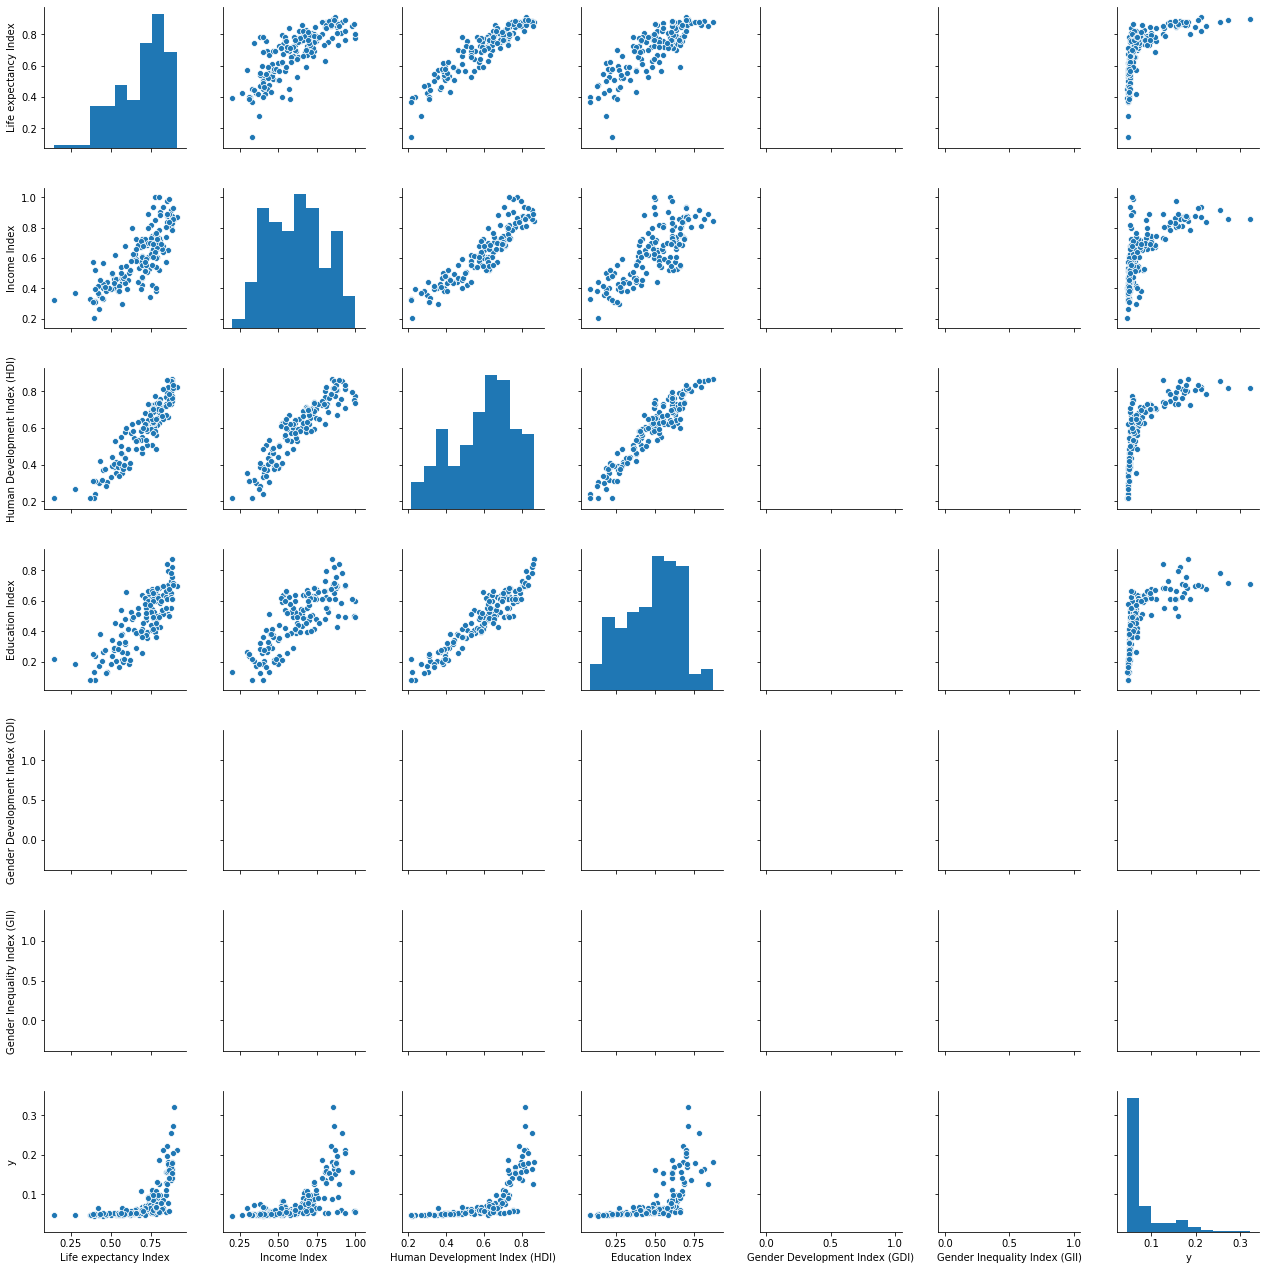

In [196]:
sns.pairplot(data_ind.loc[idx[1991, ], index_columns + ['y']])

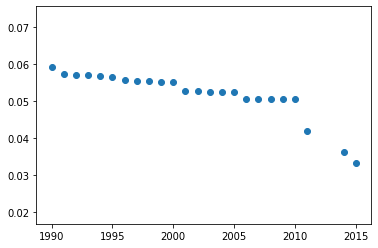

In [189]:
country = 'World'
y = data_ind.loc[idx[:, country], 'y']
x = [x[0] for x in data_ind.loc[idx[:, country], 'y'].index]
plt.scatter(x, y)

Text(0.5, 1.0, 'Life expectancy Index')

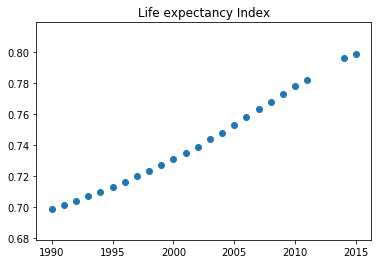

In [190]:
i = 0
y = data_ind.loc[idx[:, country], index_columns[i]]
x = [x[0] for x in data_ind.loc[idx[:, country], index_columns[i]].index]
plt.scatter(x, y)
plt.title(index_columns[i])

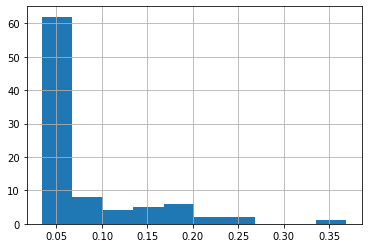

In [184]:
data_ind.loc[idx[2009,:],'y'].hist()

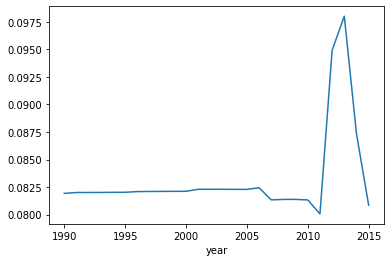

In [40]:
data_ind.groupby(level=0)['y'].mean().plot()

Text(0.5, 1.0, 'Income Index differentiated')

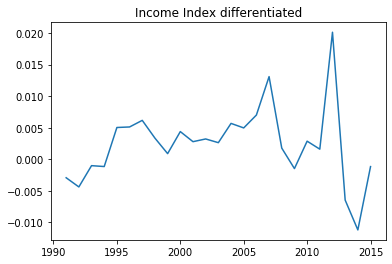

In [52]:
i = 1
a = data_ind.groupby(level=0)[index_columns[i]].mean()
y = [n - p for p,n in zip(a, a[1:])]
plt.plot(a.index[1:], y)
plt.title(index_columns[i]+' differentiated')

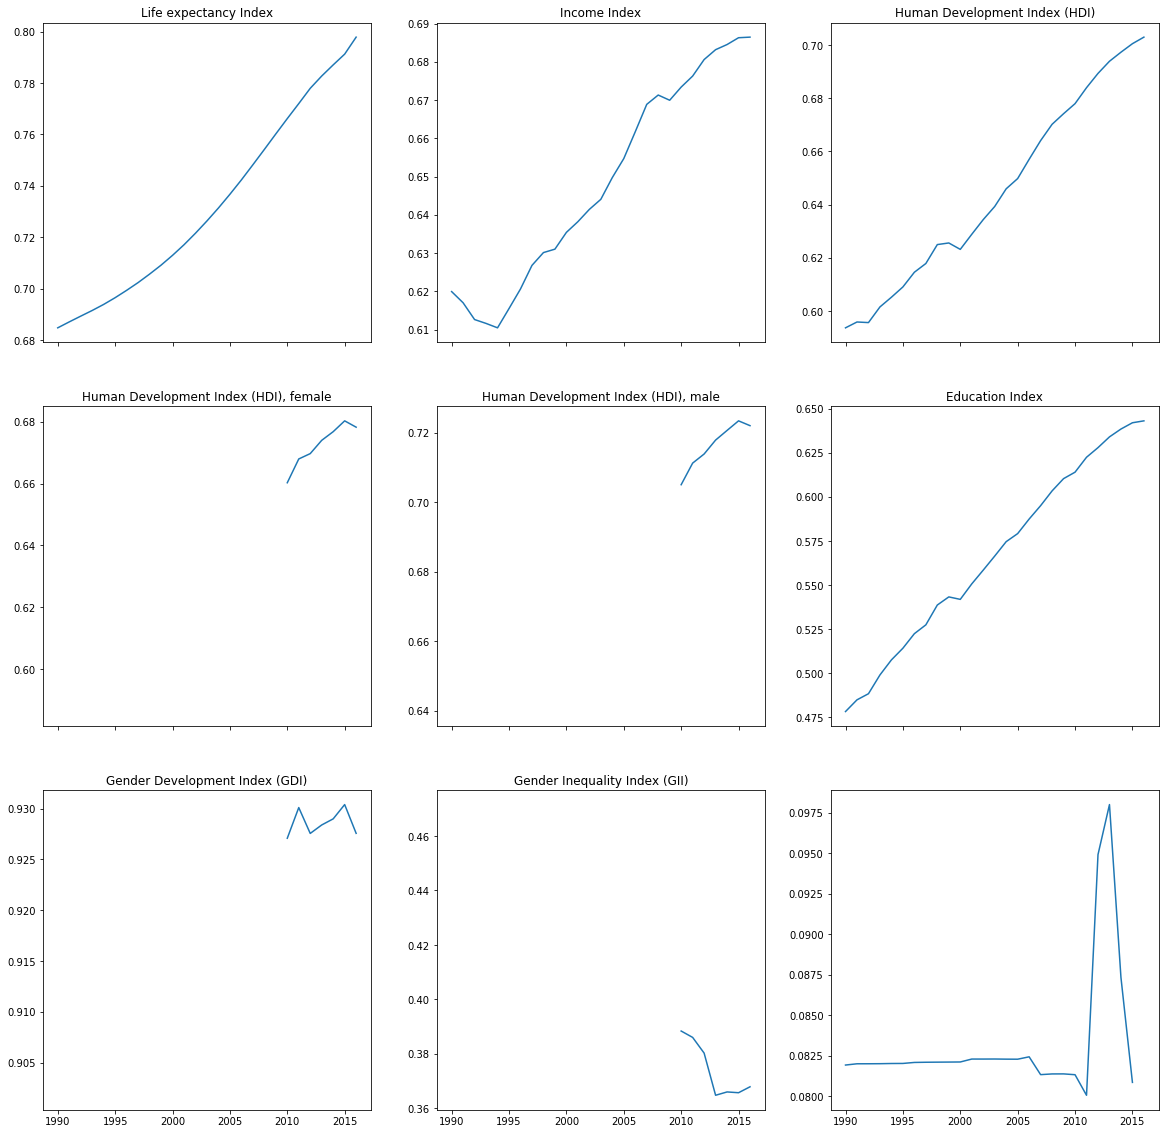

In [76]:
fig, ax = plt.subplots(3,3, figsize=(20,20), sharex=True)
for i in range(len(index_columns)):
    ax[i // 3, i % 3].plot(full_ind.groupby(level=0)[index_columns[i]].mean())
    ax[i // 3, i % 3].set_title(index_columns[i])
ax[2, 2].plot(data_ind.groupby(level=0)['y'].mean())

ValueError: Supply a 'c' argument or a 'color' kwarg but not both; they differ but their functionalities overlap.

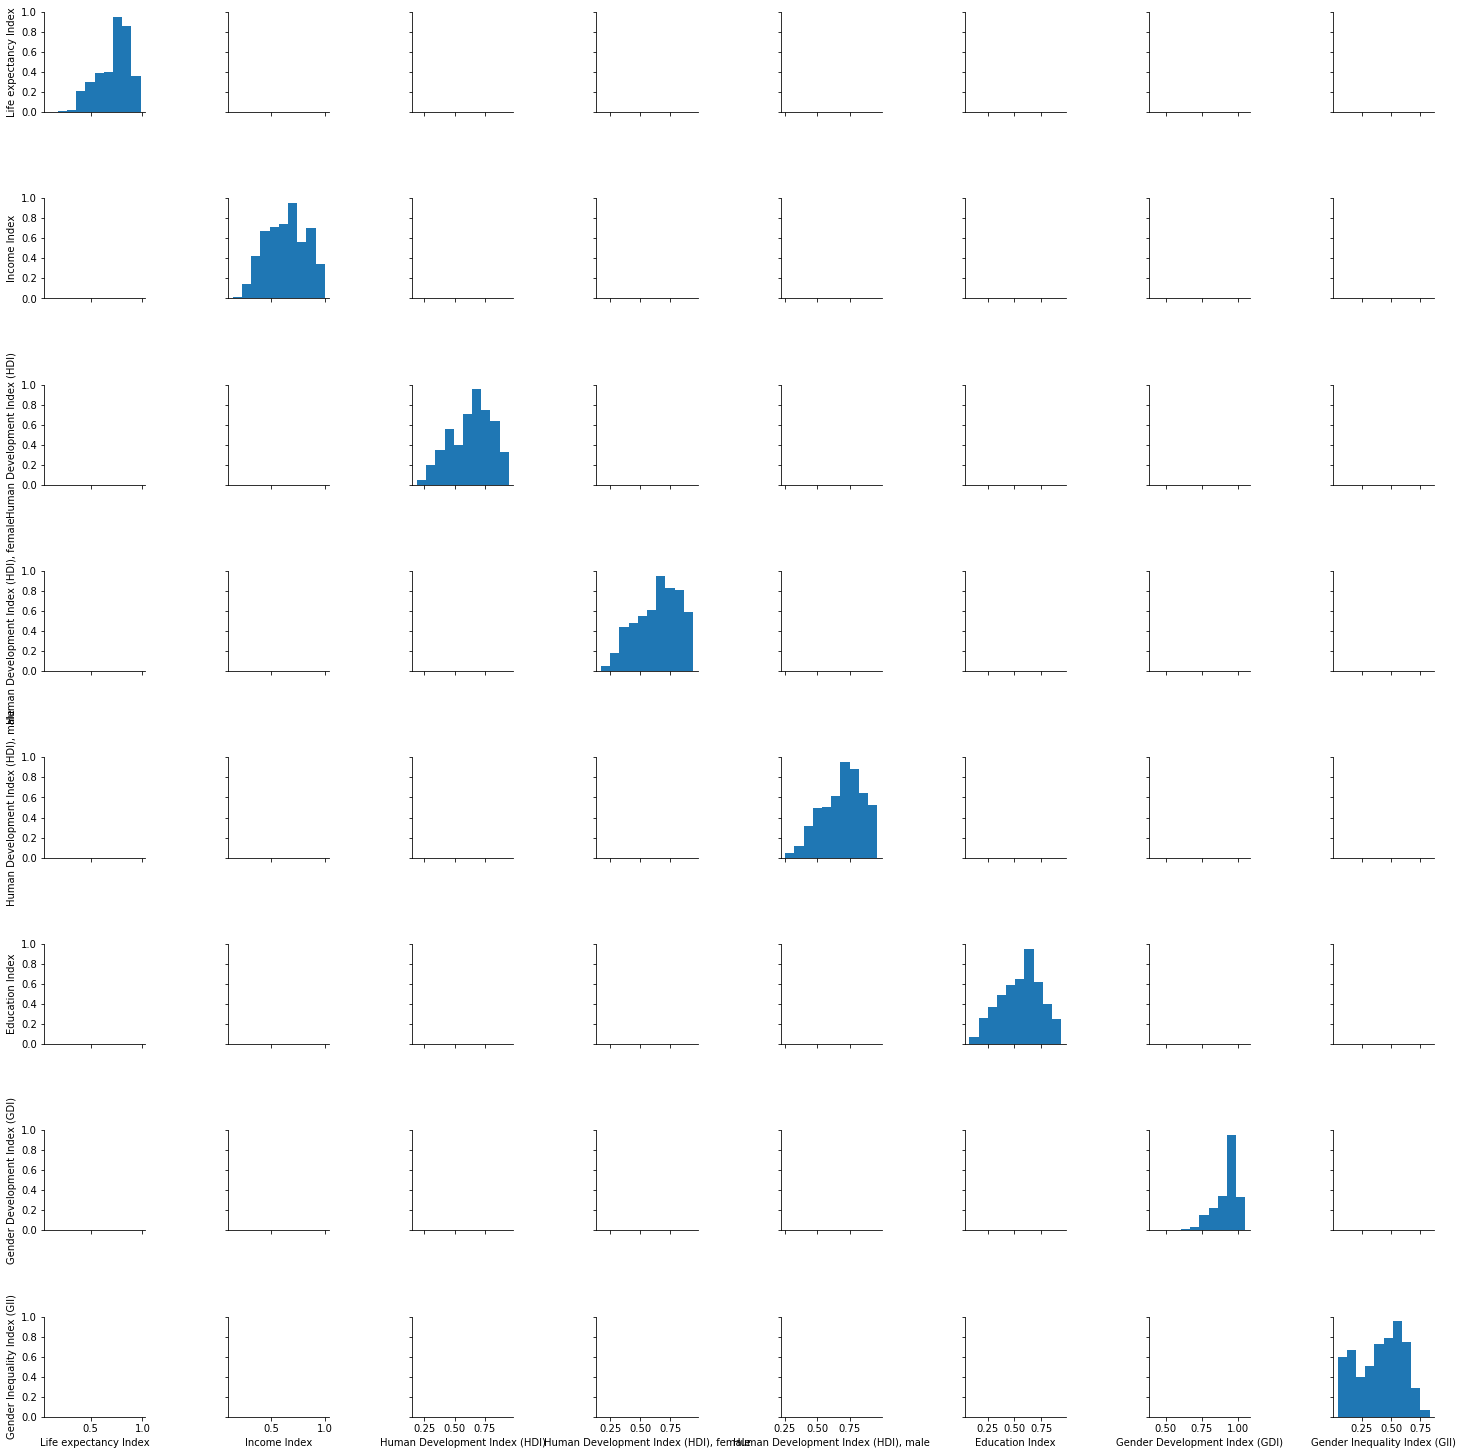

In [139]:
cmap = sns.cubehelix_palette(as_cmap=True, reverse=False)
sns.pairplot(data_ind[index_columns], plot_kws={'c': data_ind['y']})

In [130]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2, random_state = 0)
data_2d_pca = pca.fit_transform(data_ind.fillna(value=0).loc[:, index_columns])

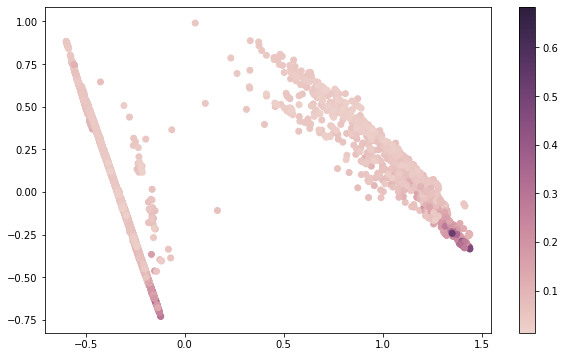

In [131]:
cmap = sns.cubehelix_palette(as_cmap=True, reverse=False)
plt.figure(figsize = (10, 10))
points = plt.scatter(data_2d_pca[:, 0], data_2d_pca[:, 1], c = data_ind['y'], cmap=cmap)
plt.colorbar(points)


In [132]:
from sklearn import manifold
mds = manifold.MDS(n_components = 2, n_init = 1, max_iter = 100)
data_2d_mds = mds.fit_transform(data_ind.fillna(value=0).loc[:, index_columns])

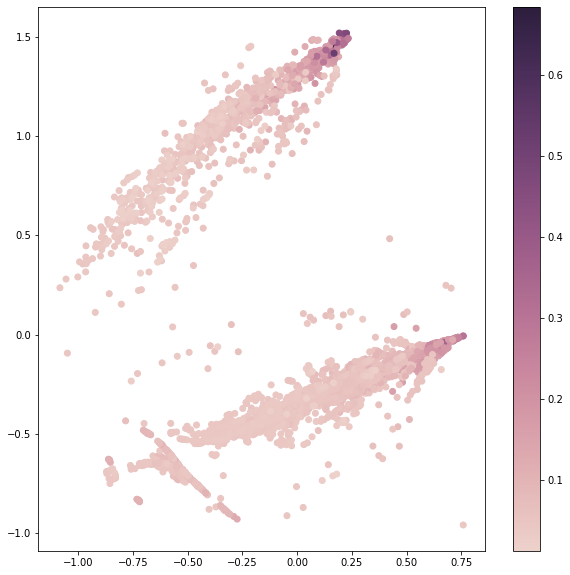

In [133]:
cmap = sns.cubehelix_palette(as_cmap=True, reverse=False)
plt.figure(figsize = (10, 10))
points = plt.scatter(data_2d_mds[:, 0], data_2d_mds[:, 1], c = data_ind['y'], cmap=cmap)
plt.colorbar(points)

In [27]:
full_ind.corr(method='spearman')

,Life expectancy Index,Life expectancy at birth,Gross national income (GNI) per capita (2011 PPP$),Income Index,Expected years of schooling (years),Mean years of schooling (years),Human Development Index (HDI),Education Index,Population using at least basic drinking-water services (%),Population using at least basic sanitation services (%),...,"Internet users, total (% of population)",Current health expenditure (% of GDP),"Human Development Index (HDI), female","Human Development Index (HDI), male",Gender Development Index (GDI),Adjusted net savings (% of GNI),"HIV prevalence, adult (% ages 15-49), total",Private capital flows (% of GDP),Gender Inequality Index (GII),y
Life expectancy Index,1.000000,0.999990,0.830331,0.830365,0.837100,0.742214,0.923844,0.811091,0.864089,0.856020,...,0.812099,0.409140,0.904162,0.931152,0.538912,0.327901,-0.592005,0.097422,-0.856769,0.757707
Life expectancy at birth,0.999990,1.000000,0.830362,0.830396,0.837071,0.742127,0.923828,0.811040,0.864082,0.856041,...,0.812178,0.409186,0.904139,0.931156,0.538843,0.327795,-0.591891,0.097087,-0.856704,0.757582
Gross national income (GNI) per capita (2011 PPP$),0.830331,0.830362,1.000000,0.999993,0.816687,0.741840,0.936966,0.799328,0.858672,0.862050,...,0.802433,0.241251,0.934189,0.950225,0.608362,0.349151,-0.455285,0.229305,-0.819122,0.683687
Income Index,0.830365,0.830396,0.999993,1.000000,0.816853,0.741875,0.937020,0.799430,0.858727,0.862004,...,0.802580,0.241316,0.934276,0.950312,0.608447,0.349095,-0.455252,0.229221,-0.819405,0.683731
Expected years of schooling (years),0.837100,0.837071,0.816687,0.816853,1.000000,0.844007,0.929874,0.945521,0.835328,0.819200,...,0.804801,0.427919,0.936289,0.926476,0.676096,0.221219,-0.417422,0.107070,-0.869992,0.668750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Adjusted net savings (% of GNI),0.327901,0.327795,0.349151,0.349095,0.221219,0.222471,0.315485,0.224198,0.327475,0.286219,...,0.288827,-0.092849,0.308664,0.320439,0.208296,1.000000,-0.228309,0.177755,-0.228518,0.235944
"HIV prevalence, adult (% ages 15-49), total",-0.592005,-0.591891,-0.455285,-0.455252,-0.417422,-0.455666,-0.527204,-0.456099,-0.585294,-0.606990,...,-0.428209,-0.126278,-0.523956,-0.583674,-0.213662,-0.228309,1.000000,-0.073153,0.539210,-0.616425
Private capital flows (% of GDP),0.097422,0.097087,0.229305,0.229221,0.107070,0.055648,0.150102,0.081401,0.148332,0.182605,...,0.119030,-0.021020,0.162264,0.191356,0.000776,0.177755,-0.073153,1.000000,-0.152065,0.153521
Gender Inequality Index (GII),-0.856769,-0.856704,-0.819122,-0.819405,-0.869992,-0.841899,-0.908858,-0.891403,-0.807258,-0.842242,...,-0.812202,-0.442917,-0.922726,-0.898753,-0.660397,-0.228518,0.539210,-0.152065,1.000000,-0.779382


In [46]:
data.corrwith(data['y'], method='pearson', axis=0).abs().sort_values()[:40:-1]

y                                                                                  1.000000
Gender Inequality Index (GII)                                                      0.748658
Old age dependency ratio (old age (65 and older) per 100 people (ages 15-64))      0.726805
Estimated gross national income per capita, female (2011 PPP$)                     0.705615
Internet users, total (% of population)                                            0.681635
Human Development Index (HDI)                                                      0.660279
Human Development Index (HDI), male                                                0.657131
Human Development Index (HDI), female                                              0.648513
Education Index                                                                    0.637161
Expected years of schooling (years)                                                0.612789
Income Index                                                                    

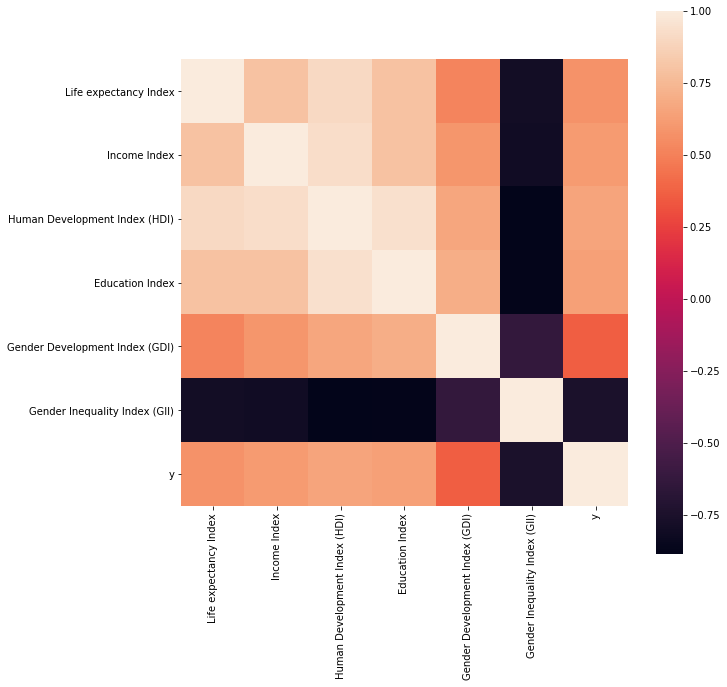

In [28]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(full_ind[index_columns+['y']].corr(method='pearson'), square=True)

In [53]:
data.columns[np.argsort(XGB.feature_importances_)[::-1] + 2]

NameError: name 'XGB' is not defined

In [ ]:
result = permutation_importance(clf, X_train, y_train, n_repeats=10,
                                random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
ax1.barh(tree_indices,
         clf.feature_importances_[tree_importance_sorted_idx], height=0.7)
ax1.set_yticklabels(data.feature_names[tree_importance_sorted_idx])
ax1.set_yticks(tree_indices)
ax1.set_ylim((0, len(clf.feature_importances_)))
ax2.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=data.feature_names[perm_sorted_idx])
fig.tight_layout()
plt.show()

In [ ]:
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

fig, ax = plt.subplots(figsize=(10, 10))
ax.barh(tree_indices,
         clf.feature_importances_[tree_importance_sorted_idx], height=0.7)
ax.set_yticklabels(data.feature_names[tree_importance_sorted_idx])
ax.set_yticks(tree_indices)
ax.set_ylim((0, len(clf.feature_importances_)))
ax.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=data.feature_names[perm_sorted_idx])
fig.tight_layout()
plt.show()

In [21]:
full_ind

Life expectancy Index  Life expectancy at birth  \
year country                                                        
1990 Afghanistan                  0.467                      50.3   
     Albania                      0.797                      71.8   
     Algeria                      0.722                      66.9   
     Angola                       0.389                      45.3   
     Argentina                    0.794                      71.6   
...                                 ...                       ...   
2016 Yemen                        0.709                      66.1   
     Vanuatu                      0.770                      70.0   
     Uruguay                      0.885                      77.5   
     Viet Nam                     0.849                      75.2   
     Zimbabwe                     0.620                      60.3   

                  Gross national income (GNI) per capita (2011 PPP$)  \
year country                                                           
1990 Afghanistan                                             2193.0    
     Albania                                                 4415.0    
     Algeria                                                 9989.0    
     Angola                                                  4139.0    
     Argentina                                              10932.0    
...                                                             ...    
2016 Yemen                                                   1966.0    
     Vanuatu                                                 2751.0    
     Uruguay                                                19196.0    
     Viet Nam                                                5638.0    
     Zimbabwe                                                2246.0    

                  Income Index  Expected years of schooling (years)  \
year country                                                          
1990 Afghanistan         0.466                                  2.6   
     Albania             0.572                                 11.6   
     Algeria             0.695                                  9.6   
     Angola              0.562                                  3.4   
     Argentina           0.709                                 13.2   
...                        ...                                  ...   
2016 Yemen               0.450                                  8.7   
     Vanuatu             0.501                                 11.4   
     Uruguay             0.794                                 16.3   
     Viet Nam            0.609                                 12.7   
     Zimbabwe            0.470                                 10.4   

                  Mean years of schooling (years)  \
year country                                        
1990 Afghanistan                              1.5   
     Albania                                  7.8   
     Algeria                                  3.6   
     Angola                                   NaN   
     Argentina                                7.9   
...                                           ...   
2016 Yemen                                    3.0   
     Vanuatu                                  6.7   
     Uruguay                                  8.7   
     Viet Nam                                 8.1   
     Zimbabwe                                 8.3   

                  Human Development Index (HDI)  Education Index  \
year country                                                       
1990 Afghanistan                          0.298            0.122   
     Albania                              0.644            0.584   
     Algeria                              0.578            0.385   
     Angola                                 NaN              NaN   
     Argentina                            0.707            0.628   
...                                         ...              ...   
2016 Yemen               

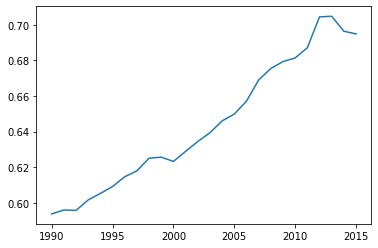

In [22]:
y = data_ind.groupby(level=0)['Human Development Index (HDI)'].mean()
plt.plot(y)